# Crop Yield Prediction

## Import Modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("crop_production.csv")
df.head(5)

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


## Data Analsyis

In [3]:
df.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [4]:
# Droping Nan Values
data = df.dropna()
print(data.shape)
test = df[~df["Production"].notna()].drop("Production",axis=1)
print(test.shape)

(242361, 7)
(3730, 6)


In [5]:
for i in data.columns:
    print("column name :",i)
    print("No. of column :",len(data[i].unique()))
    print(data[i].unique())

column name : State_Name
No. of column : 33
['Andaman and Nicobar Islands' 'Andhra Pradesh' 'Arunachal Pradesh'
 'Assam' 'Bihar' 'Chandigarh' 'Chhattisgarh' 'Dadra and Nagar Haveli'
 'Goa' 'Gujarat' 'Haryana' 'Himachal Pradesh' 'Jammu and Kashmir '
 'Jharkhand' 'Karnataka' 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Manipur'
 'Meghalaya' 'Mizoram' 'Nagaland' 'Odisha' 'Puducherry' 'Punjab'
 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana ' 'Tripura' 'Uttar Pradesh'
 'Uttarakhand' 'West Bengal']
column name : District_Name
No. of column : 646
['NICOBARS' 'NORTH AND MIDDLE ANDAMAN' 'SOUTH ANDAMANS' 'ANANTAPUR'
 'CHITTOOR' 'EAST GODAVARI' 'GUNTUR' 'KADAPA' 'KRISHNA' 'KURNOOL'
 'PRAKASAM' 'SPSR NELLORE' 'SRIKAKULAM' 'VISAKHAPATANAM' 'VIZIANAGARAM'
 'WEST GODAVARI' 'ANJAW' 'CHANGLANG' 'DIBANG VALLEY' 'EAST KAMENG'
 'EAST SIANG' 'KURUNG KUMEY' 'LOHIT' 'LONGDING' 'LOWER DIBANG VALLEY'
 'LOWER SUBANSIRI' 'NAMSAI' 'PAPUM PARE' 'TAWANG' 'TIRAP' 'UPPER SIANG'
 'UPPER SUBANSIRI' 'WEST KAMENG' 'WEST SIANG

## Data Visualization

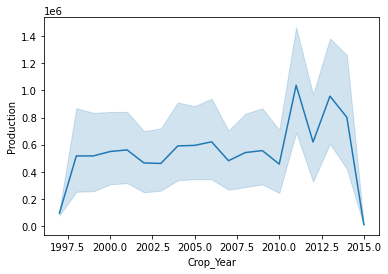

In [6]:
sns.lineplot(data["Crop_Year"],data["Production"])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text major ticklabel objects>)

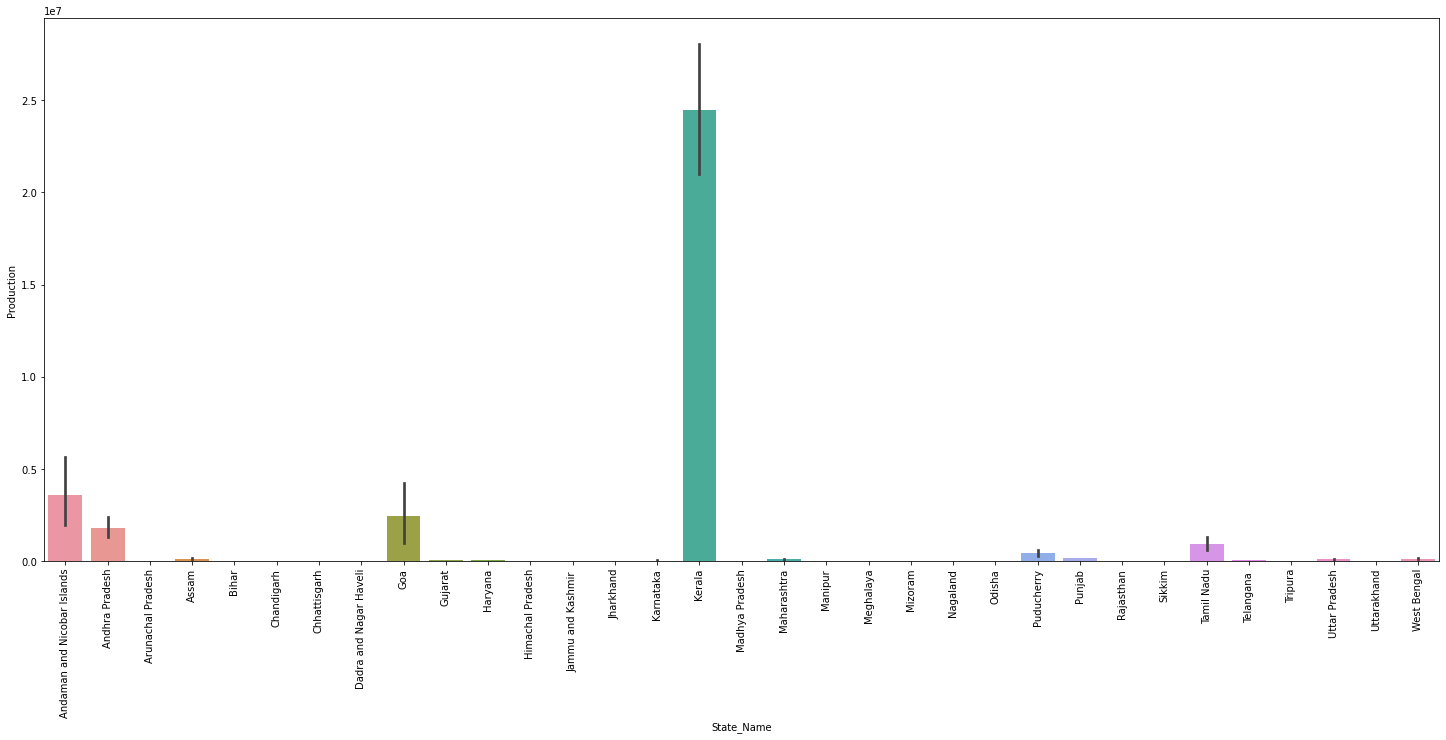

In [7]:
plt.figure(figsize=(25,10))
sns.barplot(data["State_Name"],data["Production"])
plt.xticks(rotation=90)

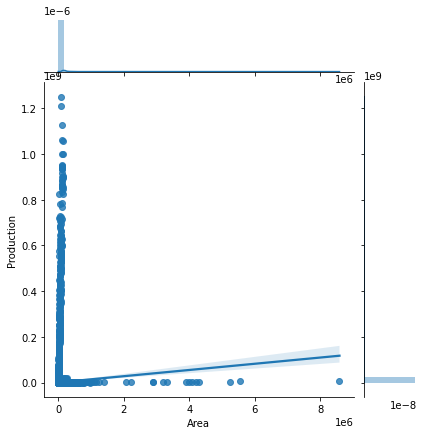

In [8]:
sns.jointplot(data["Area"],data["Production"],kind='reg')

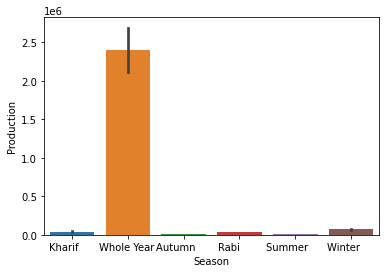

In [9]:
sns.barplot(data["Season"],data["Production"])

In [10]:
data.groupby("Season",axis=0).agg({"Production":np.sum})

,Production
Season,
Autumn,6.441377e+07
Kharif,4.029970e+09
Rabi,2.051688e+09
Summer,1.706579e+08
Whole Year,1.344248e+11
Winter,4.345498e+08


In [11]:
data["Crop"].value_counts()[:5]

Rice                 15082
Maize                13787
Moong(Green Gram)    10106
Urad                  9710
Sesamum               8821
Name: Crop, dtype: int64

In [12]:
top_crop_pro = data.groupby("Crop")["Production"].sum().reset_index().sort_values(by='Production',ascending=False)
top_crop_pro[:5]

,Crop,Production
28,Coconut,1.299816e+11
106,Sugarcane,5.535682e+09
95,Rice,1.605470e+09
119,Wheat,1.332826e+09
87,Potato,4.248263e+08


<b> 1. Picking up Rice Crop </b>

In [13]:
rice_df = data[data["Crop"]=="Rice"]
print(rice_df.shape)
rice_df[:3]

(15082, 7)


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.00
12,Andaman and Nicobar Islands,NICOBARS,2001,Kharif,Rice,83.0,300.00
18,Andaman and Nicobar Islands,NICOBARS,2002,Kharif,Rice,189.2,510.84


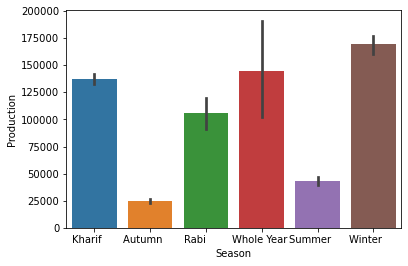

In [14]:
sns.barplot("Season","Production",data=rice_df)

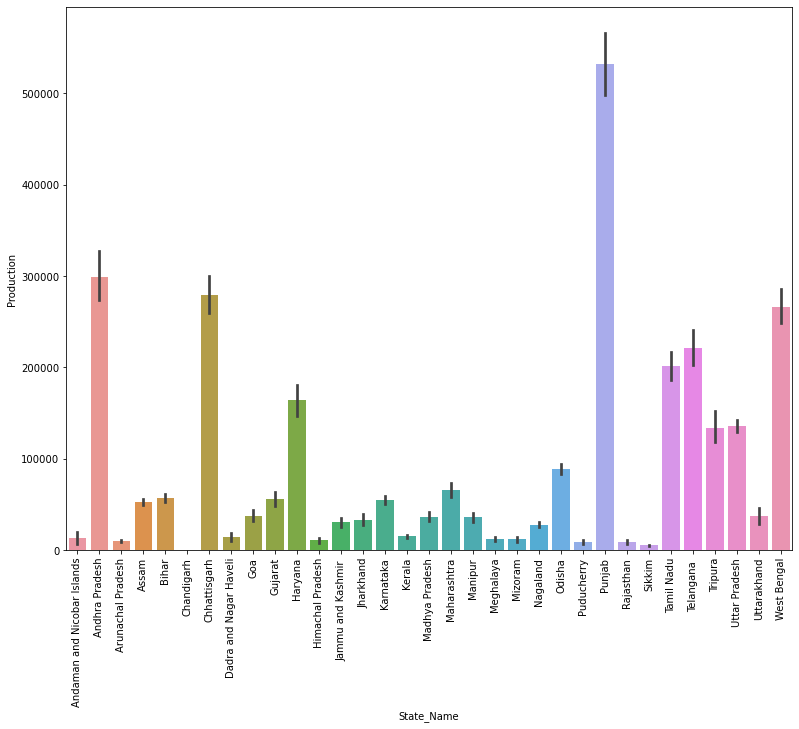

In [15]:
plt.figure(figsize=(13,10))
sns.barplot("State_Name","Production",data=rice_df)
plt.xticks(rotation=90)
plt.show()

In [16]:
top_rice_pro_dis = rice_df.groupby("District_Name")["Production"].sum().reset_index().sort_values(
    by='Production',ascending=False)
top_rice_pro_dis[:5]
sum_max = top_rice_pro_dis["Production"].sum()
top_rice_pro_dis["precent_of_pro"] = top_rice_pro_dis["Production"].map(lambda x:(x/sum_max)*100)
top_rice_pro_dis[:5]

,District_Name,Production,precent_of_pro
58,BARDHAMAN,34239976.0,2.132707
374,MEDINIPUR WEST,29192719.0,1.818328
612,WEST GODAVARI,27845309.0,1.734402
169,EAST GODAVARI,24690929.0,1.537925
494,SANGRUR,24448000.0,1.522794


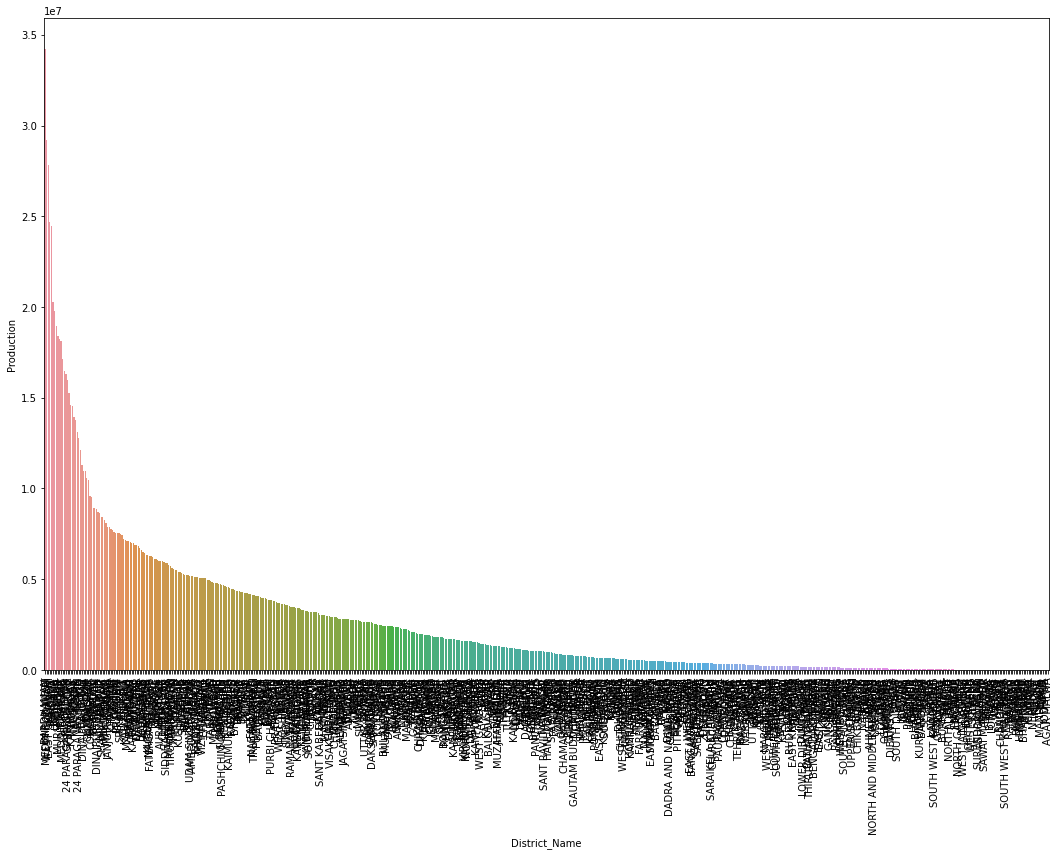

In [17]:
plt.figure(figsize=(18,12))
sns.barplot("District_Name","Production",data=top_rice_pro_dis)
plt.xticks(rotation=90)
plt.show()

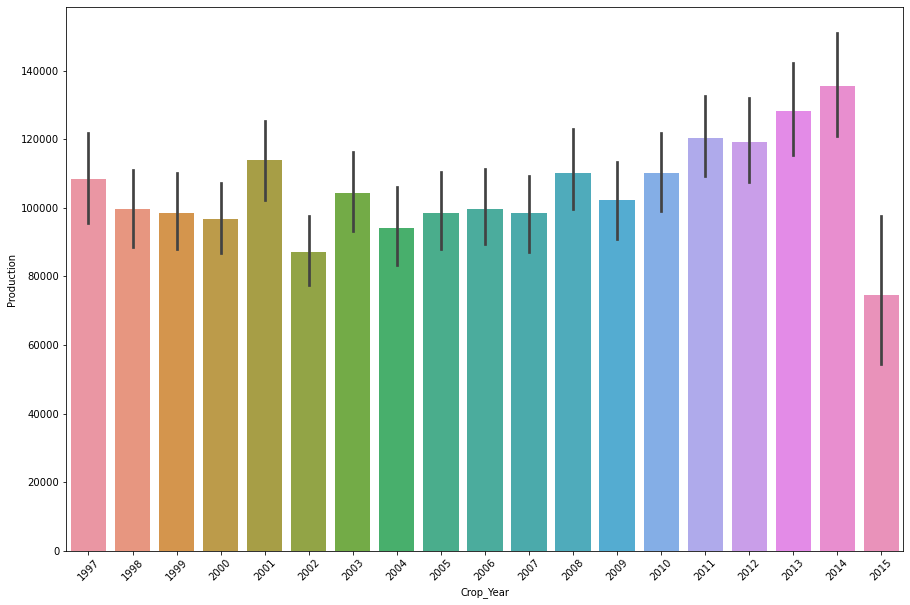

In [18]:
plt.figure(figsize=(15,10))
sns.barplot("Crop_Year","Production",data=rice_df)
plt.xticks(rotation=45)
plt.show()

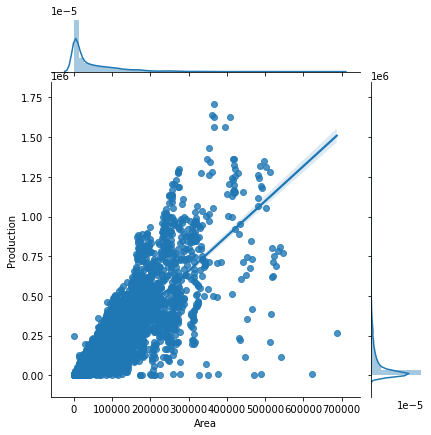

In [19]:
sns.jointplot("Area","Production",data=rice_df,kind="reg")

<b> Rice production is mostly depends on Season, Area, State(place)</b>

<b> 2. Picking up Coconut </b>

In [20]:
coc_df = data[data["Crop"]=="Coconut "]
print(coc_df.shape)
coc_df[:3]

(1958, 7)


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
5,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Coconut,18168.0,65100000.0
14,Andaman and Nicobar Islands,NICOBARS,2001,Whole Year,Coconut,18190.0,64430000.0
23,Andaman and Nicobar Islands,NICOBARS,2002,Whole Year,Coconut,18240.0,67490000.0


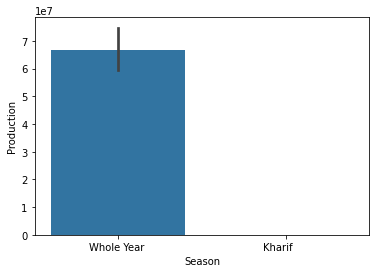

In [21]:
sns.barplot("Season","Production",data=coc_df)

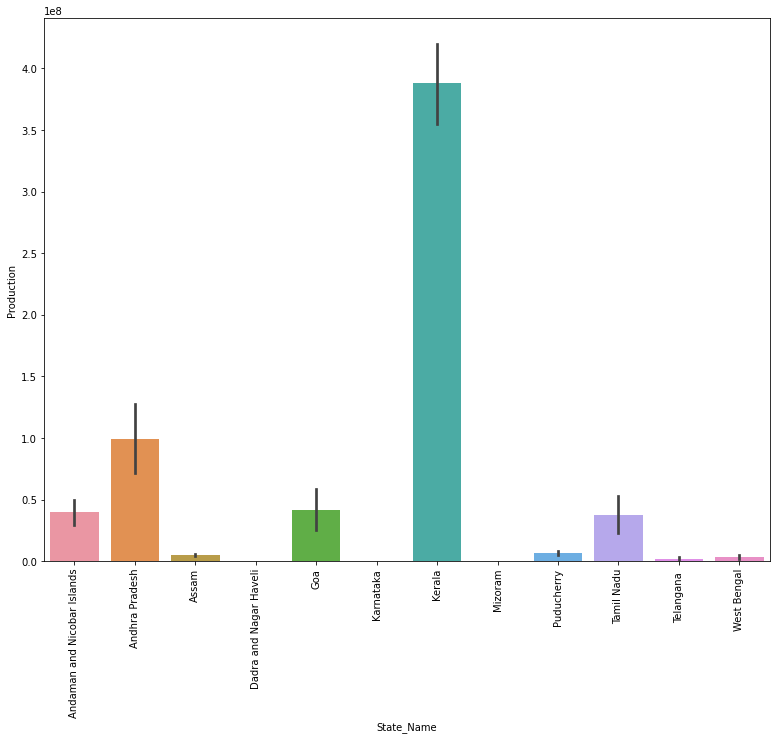

In [22]:
plt.figure(figsize=(13,10))
sns.barplot("State_Name","Production",data=coc_df)
plt.xticks(rotation=90)
plt.show()

In [23]:
top_coc_pro_dis = coc_df.groupby("District_Name")["Production"].sum().reset_index().sort_values(
    by='Production',ascending=False)
top_coc_pro_dis[:5]
sum_max = top_coc_pro_dis["Production"].sum()
top_coc_pro_dis["precent_of_pro"] = top_coc_pro_dis["Production"].map(lambda x:(x/sum_max)*100)
top_coc_pro_dis[:5]

,District_Name,Production,precent_of_pro
77,KOZHIKODE,1.527871e+10,11.754512
86,MALAPPURAM,1.451252e+10,11.165052
129,THIRUVANANTHAPURAM,1.001337e+10,7.703678
131,THRISSUR,9.920739e+09,7.632416
64,KANNUR,9.780310e+09,7.524379


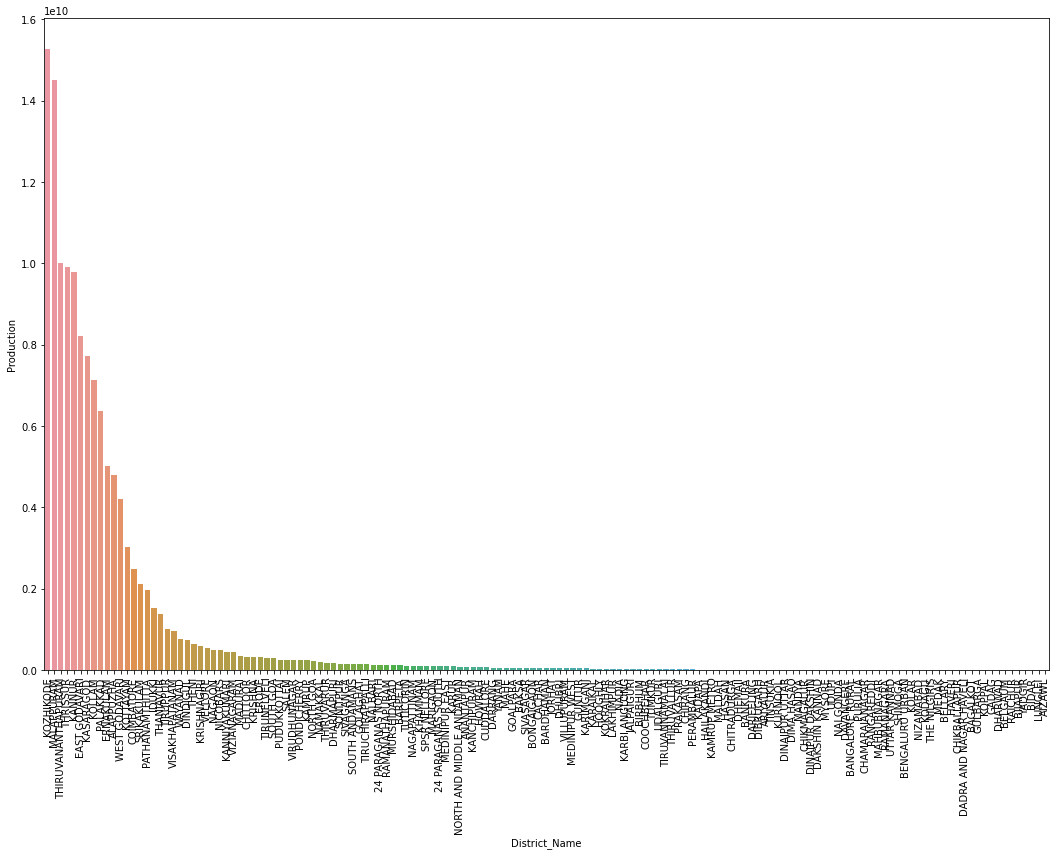

In [24]:
plt.figure(figsize=(18,12))
sns.barplot("District_Name","Production",data=top_coc_pro_dis)
plt.xticks(rotation=90)
plt.show()

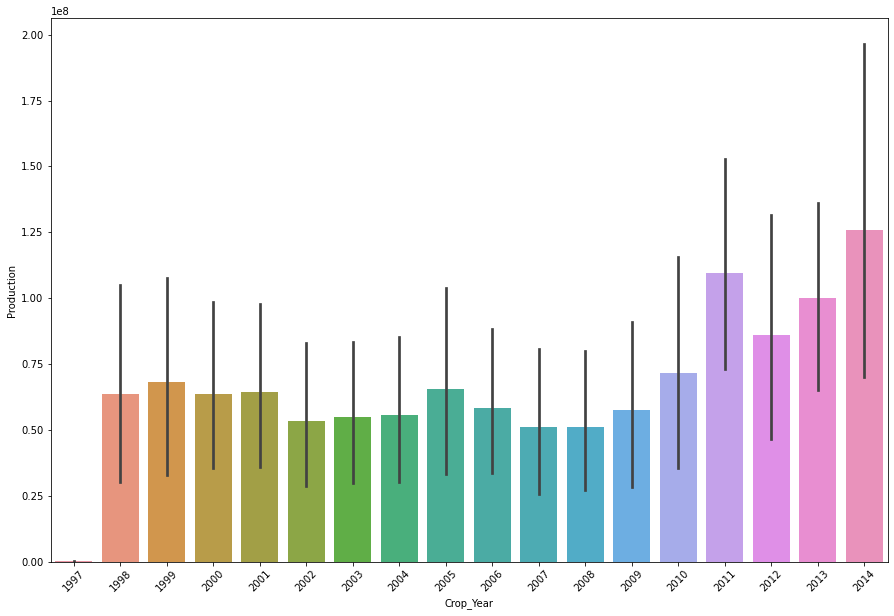

In [25]:
plt.figure(figsize=(15,10))
sns.barplot("Crop_Year","Production",data=coc_df)
plt.xticks(rotation=45)
plt.show()

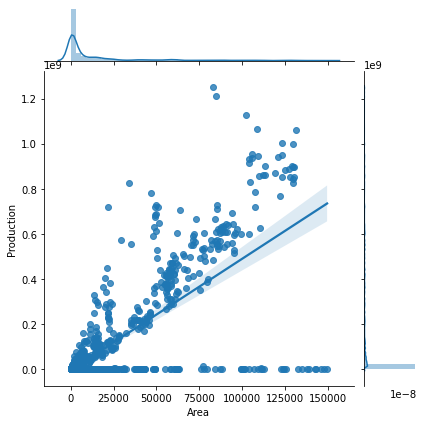

In [26]:
sns.jointplot("Area","Production",data=coc_df,kind="reg")

 * Cocunut production is directly proportional to area <br>
 * It's production is also gradually increasing over a time of period<br>
 * Production is highin kerala state<br>
 * It does not depends on season<br>

<b> 3. Picking up Sugarcane </b>

In [27]:
sug_df = data[data["Crop"]=="Sugarcane"]
print(sug_df.shape)
sug_df[:3]

(7827, 7)


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
7,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Sugarcane,1.0,2.0
16,Andaman and Nicobar Islands,NICOBARS,2001,Whole Year,Sugarcane,1.0,1.0
26,Andaman and Nicobar Islands,NICOBARS,2002,Whole Year,Sugarcane,5.0,40.0


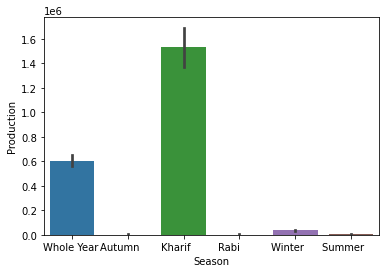

In [28]:
sns.barplot("Season","Production",data=sug_df)

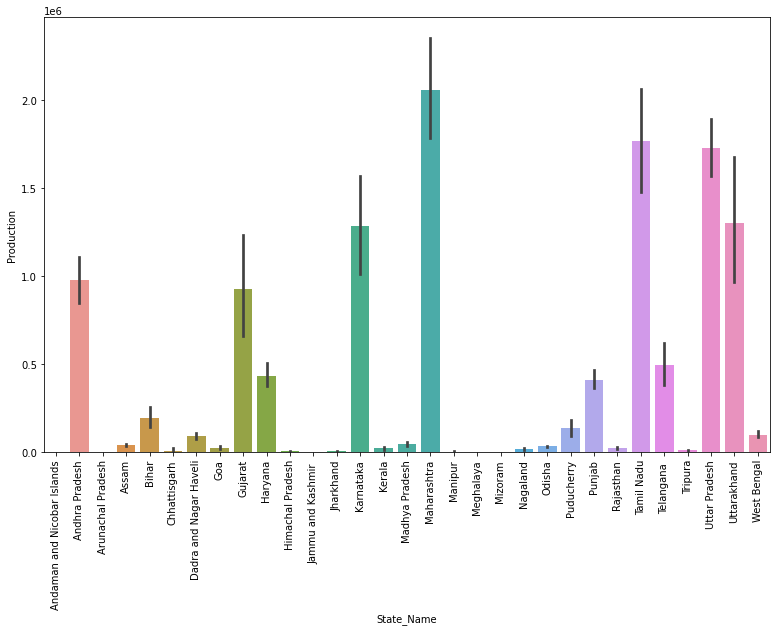

In [29]:
plt.figure(figsize=(13,8))
sns.barplot("State_Name","Production",data=sug_df)
plt.xticks(rotation=90)
plt.show()

In [30]:
top_sug_pro_dis = sug_df.groupby("District_Name")["Production"].sum().reset_index().sort_values(
    by='Production',ascending=False)
top_sug_pro_dis[:5]
sum_max = top_sug_pro_dis["Production"].sum()
top_sug_pro_dis["precent_of_pro"] = top_sug_pro_dis["Production"].map(lambda x:(x/sum_max)*100)
top_sug_pro_dis[:5]

,District_Name,Production,precent_of_pro
360,MUZAFFARNAGAR,258698795.0,4.673296
81,BIJNOR,230907185.0,4.171251
283,KHERI,224383685.0,4.053407
63,BELGAUM,198207649.0,3.580546
294,KOLHAPUR,157210426.0,2.839947


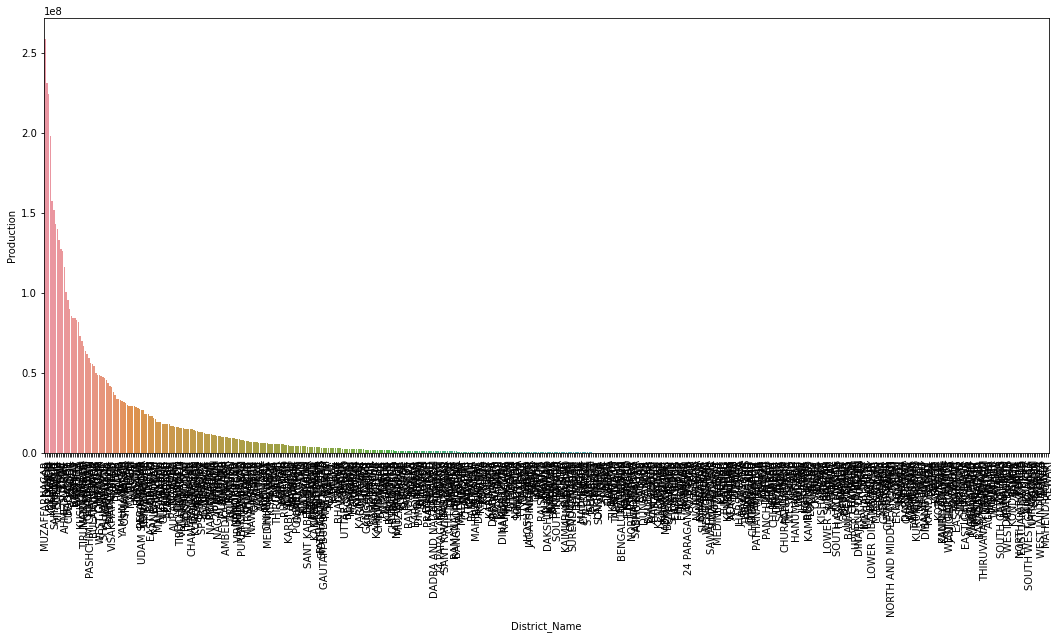

In [31]:
plt.figure(figsize=(18,8))
sns.barplot("District_Name","Production",data=top_sug_pro_dis)
plt.xticks(rotation=90)
plt.show()

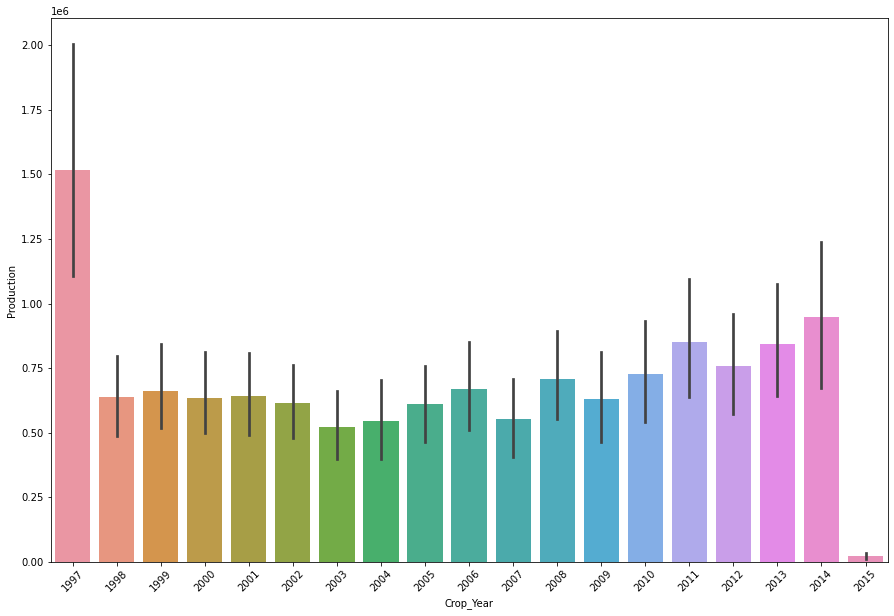

In [32]:
plt.figure(figsize=(15,10))
sns.barplot("Crop_Year","Production",data=sug_df)
plt.xticks(rotation=45)
plt.show()

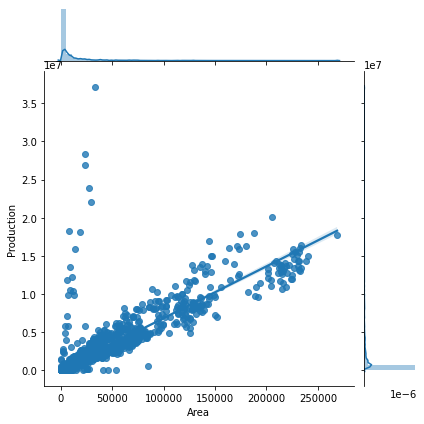

In [33]:
sns.jointplot("Area","Production",data=sug_df,kind="reg")

 * Sugarecane production is directly proportional to area <br>
 * And the production is high in some state only.

# Feature Selection

In [34]:
data1 = data.drop(["District_Name","Crop_Year"],axis=1)

In [35]:
data_dum = pd.get_dummies(data1)
data_dum[:5]

,Area,Production,State_Name_Andaman and Nicobar Islands,State_Name_Andhra Pradesh,State_Name_Arunachal Pradesh,State_Name_Assam,State_Name_Bihar,State_Name_Chandigarh,State_Name_Chhattisgarh,State_Name_Dadra and Nagar Haveli,...,Crop_Turmeric,Crop_Turnip,Crop_Urad,Crop_Varagu,Crop_Water Melon,Crop_Wheat,Crop_Yam,Crop_other fibres,Crop_other misc. pulses,Crop_other oilseeds
0,1254.0,2000.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,102.0,321.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,176.0,641.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,720.0,165.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Data split-up test/train

In [36]:
x = data_dum.drop("Production",axis=1)
y = data_dum[["Production"]]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33, random_state=42)
print("x_train :",x_train.shape)
print("x_test :",x_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)

x_train : (162381, 164)
x_test : (79980, 164)
y_train : (162381, 1)
y_test : (79980, 1)


In [37]:
x_train[:5]

,Area,State_Name_Andaman and Nicobar Islands,State_Name_Andhra Pradesh,State_Name_Arunachal Pradesh,State_Name_Assam,State_Name_Bihar,State_Name_Chandigarh,State_Name_Chhattisgarh,State_Name_Dadra and Nagar Haveli,State_Name_Goa,...,Crop_Turmeric,Crop_Turnip,Crop_Urad,Crop_Varagu,Crop_Water Melon,Crop_Wheat,Crop_Yam,Crop_other fibres,Crop_other misc. pulses,Crop_other oilseeds
4843,785.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20626,1250.0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
240277,2.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20664,60.0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
157859,605.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Training the model

# Model 1: Linear Regression

In [38]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [39]:
preds = model.predict(x_test)

In [40]:
from sklearn.metrics import mean_squared_error, r2_score
mean_squared_error(y_test,preds)
r = r2_score(y_test,preds)
print("R2score when we predict using Linear regression is ",r)

R2score when we predict using Linear regression is  0.14641046241956335


# Model 2: Random Forest

In [41]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train,y_train)
preds = model.predict(x_test)

<ipython-input-41-4ca1b29fb4ce>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train,y_train)


In [43]:
from sklearn.metrics import r2_score
r1 = r2_score(y_test,preds)
print("R2score when we predict using Randomn forest is ",r1)

R2score when we predict using Randomn forest is  0.7057402795016656


# Prediction

<b> Random forest has high r2score when compare to other model</b>

In [44]:
tst = test.drop(["District_Name","Crop_Year"],axis=1)
tst_dum = pd.get_dummies(tst)
tst_dum[:5]

,Area,State_Name_Andaman and Nicobar Islands,State_Name_Andhra Pradesh,State_Name_Arunachal Pradesh,State_Name_Assam,State_Name_Bihar,State_Name_Chandigarh,State_Name_Chhattisgarh,State_Name_Goa,State_Name_Gujarat,...,Crop_Soyabean,Crop_Sugarcane,Crop_Sunflower,Crop_Sweet potato,Crop_Tapioca,Crop_Tobacco,Crop_Turmeric,Crop_Urad,Crop_Wheat,Crop_other oilseeds
46,795.67,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51,17.00,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
623,1000.00,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
630,1000.00,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
698,8.00,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
y_test = tst_dum.copy()
print(x_train.shape)
print(y_test.shape)

(162381, 164)
(3730, 92)


In [46]:
def common_member(x_train,x_test): 
    a_set =  set(x_train.columns.tolist())
    b_set =  set(x_test.columns.tolist())
    if (a_set & b_set): 
        return list(a_set & b_set)

In [47]:
com_fea = common_member(x_train,tst_dum)
len(com_fea)

92

In [48]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train[com_fea],y_train)
preds = model.predict(y_test[com_fea])

<ipython-input-48-cd9e8306d55f>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train[com_fea],y_train)


In [49]:
preds

array([799.855     ,  12.84254435, 875.22      , ..., 280.339     ,
       405.81      ,   1.09833333])

In [50]:
test["production"] = preds

In [51]:
test[:10]

,State_Name,District_Name,Crop_Year,Season,Crop,Area,production
46,Andaman and Nicobar Islands,NICOBARS,2005,Whole Year,Arecanut,795.67,799.855000
51,Andaman and Nicobar Islands,NICOBARS,2005,Whole Year,Dry chillies,17.00,12.842544
623,Andhra Pradesh,ANANTAPUR,2007,Kharif,Moong(Green Gram),1000.00,875.220000
630,Andhra Pradesh,ANANTAPUR,2007,Rabi,Horse-gram,1000.00,815.265000
698,Andhra Pradesh,ANANTAPUR,2009,Rabi,Rapeseed &Mustard,8.00,5.127881
723,Andhra Pradesh,ANANTAPUR,2010,Kharif,Other Kharif pulses,1.00,14.913746
1153,Andhra Pradesh,CHITTOOR,2001,Rabi,Wheat,4.00,3.021333
1317,Andhra Pradesh,CHITTOOR,2004,Rabi,Wheat,2.00,1.910000
1419,Andhra Pradesh,CHITTOOR,2007,Kharif,Moong(Green Gram),1000.00,875.220000
1423,Andhra Pradesh,CHITTOOR,2007,Kharif,Small millets,1000.00,870.270000


In [52]:
test.to_csv('Prediction.csv')